In [23]:
# Datos
import numpy as np 
import pandas as pd 

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [24]:
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

In [25]:
attributes_spotify.head()

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

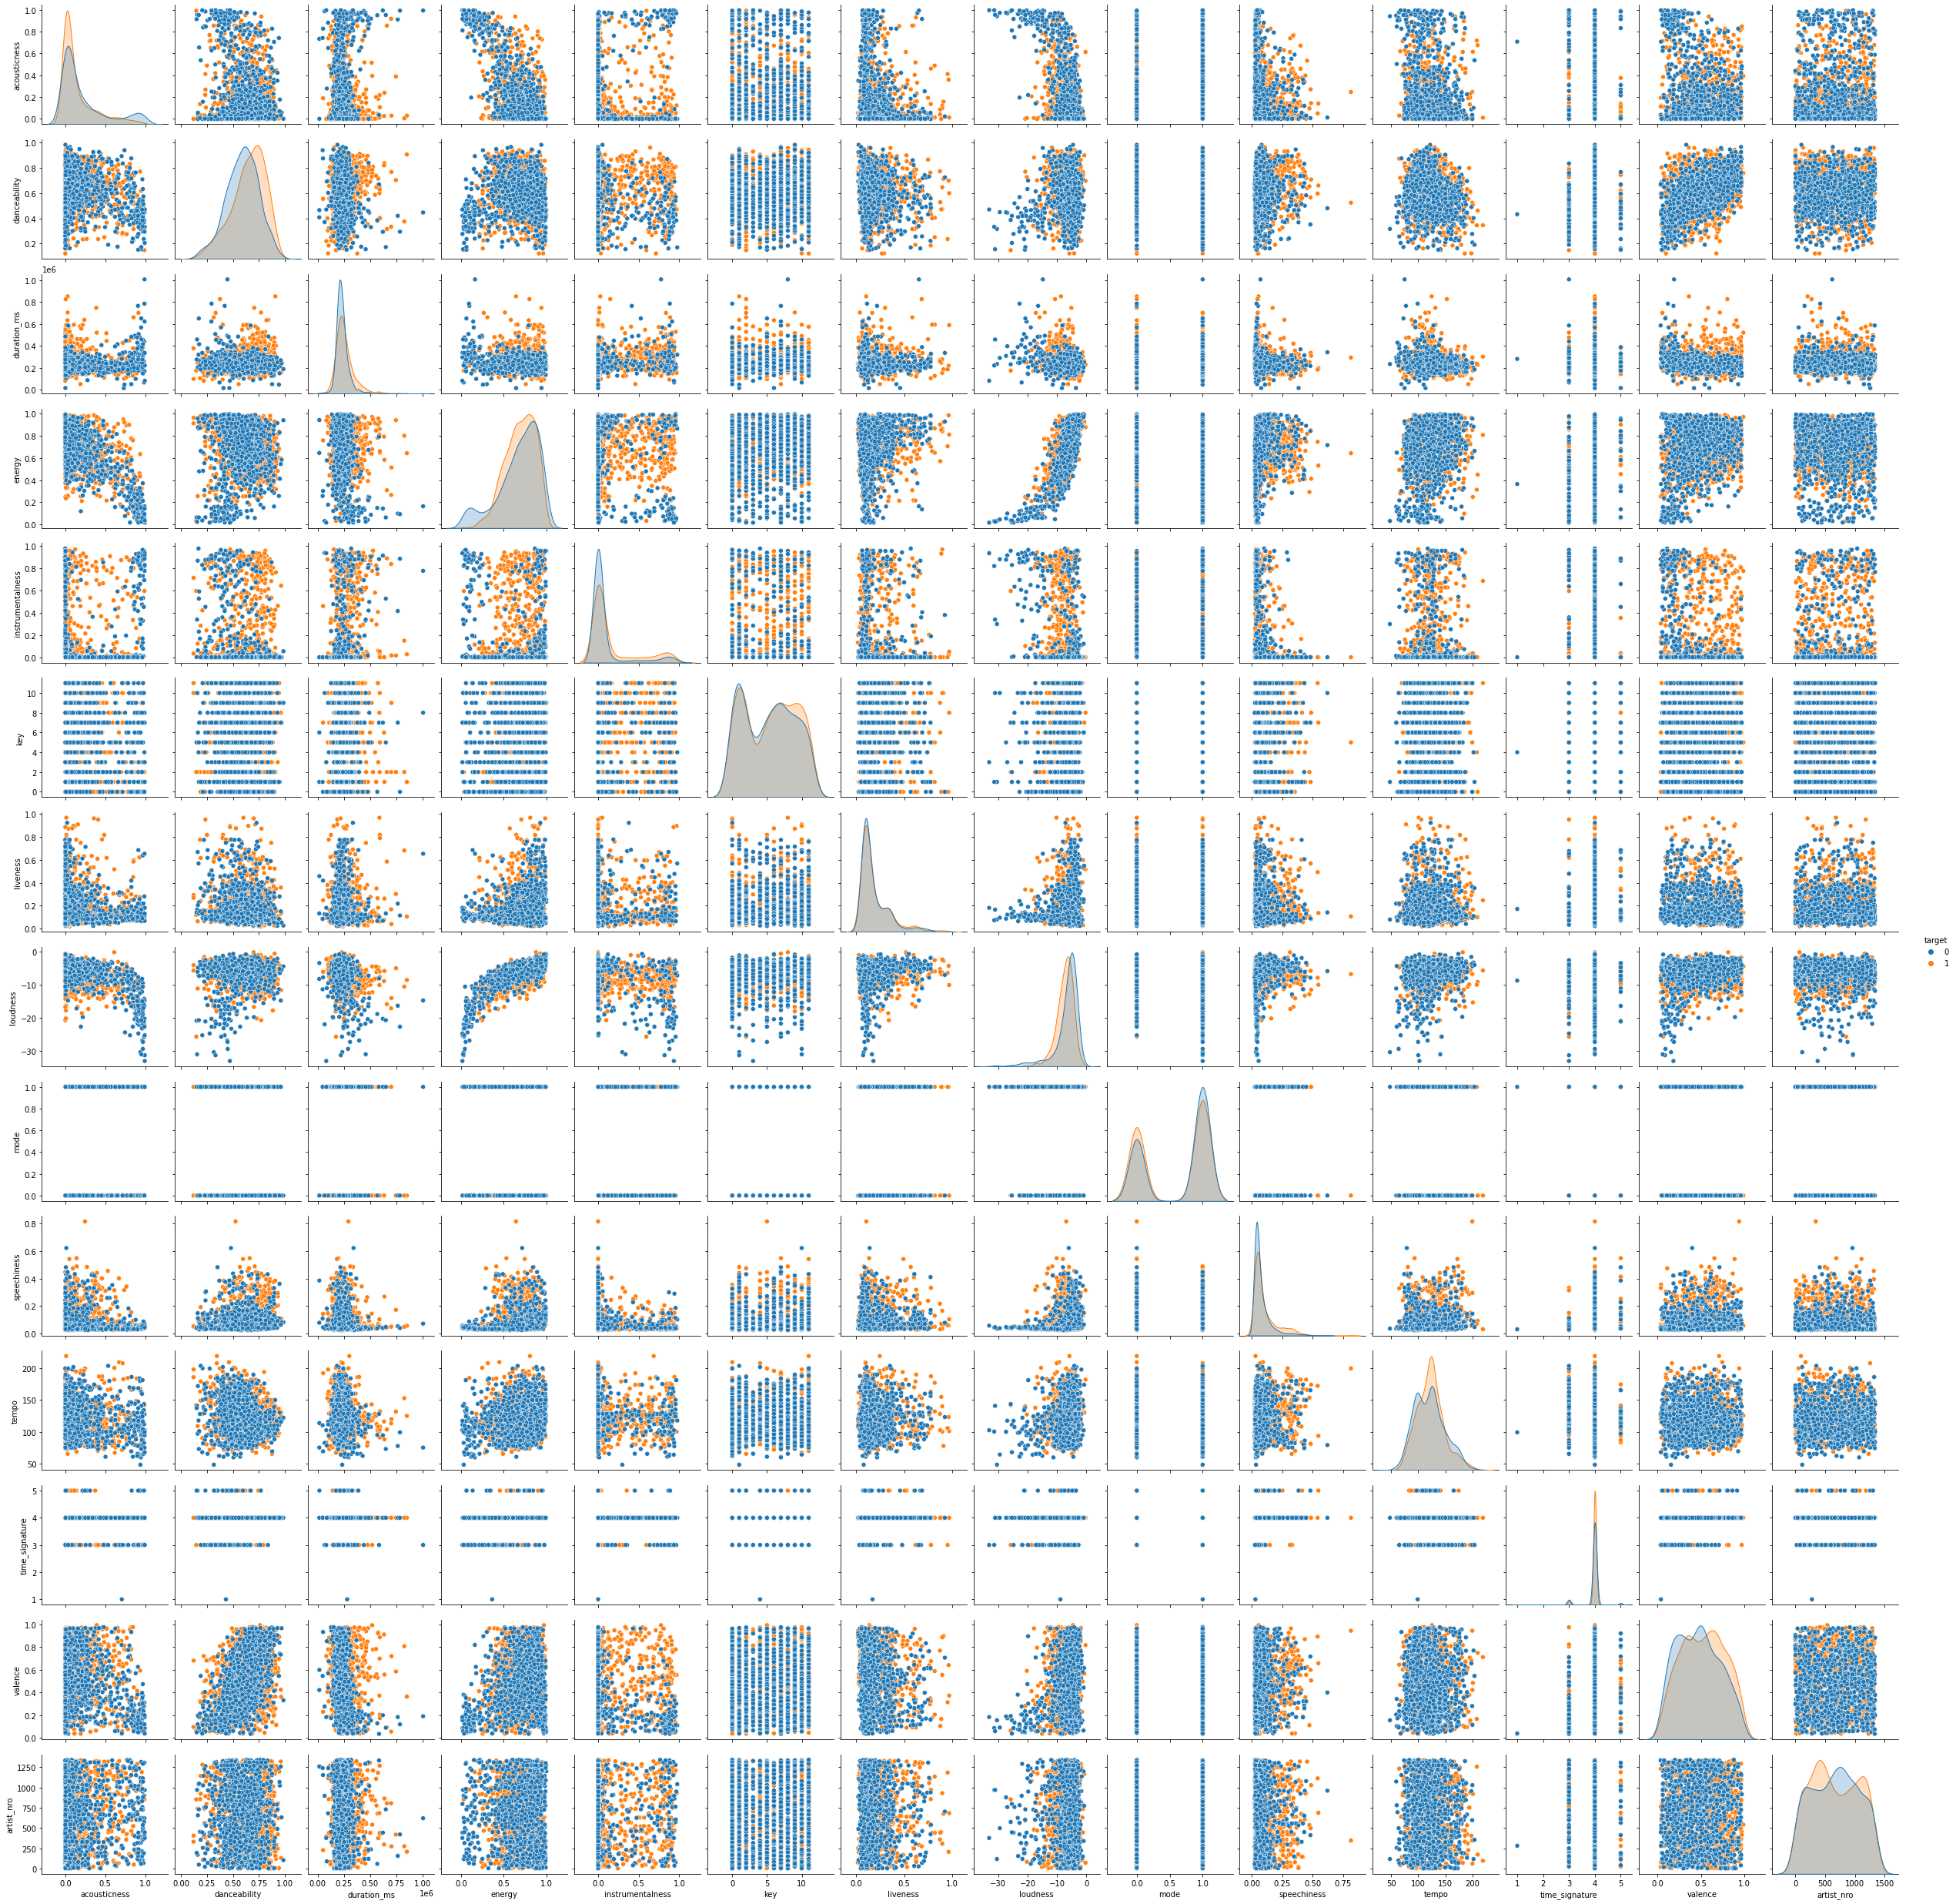

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

u = np.unique(attributes_spotify['artist'])
a = attributes_spotify['artist'].map({k: i for i, k in enumerate(u)})
#attributes_spotify.apply(  )
attributes_spotify.insert(14, "artist_nro", a, True) 

cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target', 'artist_nro']
sns.pairplot(attributes_spotify[cols], hue='target')

**No se observa una clara sepación de clases en ninguna de las caracteristicas, en algunos gráficos de pares de caracteristicas hay alguna separación, pero parece que va a ser complicada la clasificación** 

In [32]:
#cols_d = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'artist_nro']
cols_d = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness']
target = 'target'
tam_test = 0.5
X = attributes_spotify[cols_d]
y = attributes_spotify['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tam_test, random_state=42, stratify=y)

In [33]:
#Junto las clases para el entrenamiento. Por ahora sin separar train y test. Para ver los parametros del 
knn = KNeighborsClassifier()

param_grid = {"n_neighbors" : [6, 10, 20, 30, 35, 40, 45, 50]
             } 

# run grid search
grid_search = GridSearchCV(knn, cv=30, param_grid=param_grid)
grid_search.fit( X_train, y_train )

print(grid_search.best_estimator_)

print(grid_search.best_score_)
print(grid_search.cv_results_['mean_test_score'])
print(grid_search.cv_results_['std_test_score'])

KNeighborsClassifier(n_neighbors=40)
0.5873440285204992
[0.56149733 0.53888889 0.56440879 0.5664587  0.57944147 0.58734403
 0.58330362 0.57644088]
[0.06150637 0.07409217 0.06930507 0.0715236  0.07173137 0.07822449
 0.08249247 0.08161731]


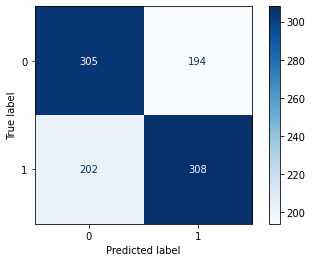

Metricas obtenidas: 
Exactitud = 0.61
Precision = 0.61
f-measure = 0.61


In [34]:
mejor_estimador=grid_search.best_estimator_
y_pred = mejor_estimador.predict(X_test)


disp = plot_confusion_matrix(mejor_estimador, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

plt.show()



cm = confusion_matrix( y_test, y_pred)

tp = cm[0,0]  
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

total = tp + tn + fp + fn

exactitud = metrics.accuracy_score(y_test, y_pred)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f_measure = (2*precision*recall) / (precision + recall)

print( "Metricas obtenidas: \nExactitud = %.2f" % exactitud )
print( "Precision = %.2f" % precision)
print("f-measure = %.2f"  % f_measure )

In [ ]:
#Saco más columnas... 
